# Adaptation of a Project By Datacamp
### Solution Proposal by: André Fernandes
### Found me on:
#### -> https://github.com/vBarFace 
#### -> https://www.linkedin.com/in/andr%C3%A9-fernandes-868006207/

# ------------------------------------

## Exercise introduction by Datacamp: 

###### DigiNsure Inc. is an innovative insurance company focused on enhancing the efficiency of processing claims and customer service interactions. Their newest initiative is digitizing all historical insurance claim documents, which includes improving the labeling of some IDs scanned from paper documents and identifying them as primary or secondary IDs.

###### To help them in their effort, you'll be using multi-modal learning to train an Optical Character Recognition (OCR) model. To improve the classification, the model will use images of the scanned documents as input and their insurance type (home, life, auto, health, or other). Integrating different data modalities (such as image and text) enables the model to perform better in complex scenarios, helping to capture more nuanced information. The labels that the model will be trained to identify are of two types: a primary and a secondary ID, for each image-insurance type pair.

# ------------------------------------

## Project Instructions:

##### Develop an Optical Character Recognition (OCR) model to sort categories of ID codes extracted from scanned insurance documents.
##### - Create a model named OCRModel in PyTorch. It should have the following specifications:
######   - A network architecture with different layers to ingest both the image and the type. The layers relative to the image should be saved as a sequential module called image_layer, and compatible the input dimensions of the images (64x64 pixels size).
######  - A Conv2d layer with kernel size 3x3, padding 1, and appropriate in/out channels.
##### - Train the Model: call the model as model and use an appropriate optimizer and loss function to train it. Iterate through your training for ten epochs.l.

# ------------------------------------

### Given code by Datacamp:

In [5]:
#!pip install torchvisio

In [6]:
# Import the necessary libraries
#import matplotlib.pyplot as plt
#import numpy as np
#from project_utils import ProjectDataset
#import pickle 
#import torch
#import torch.nn as nn
#from torch.utils.data import DataLoader

# Load the data
#dataset = pickle.load(open('ocr_insurance_dataset.pkl', 'rb'))

# Define a function to visualize codes with their corresponding types and labels 
#def show_dataset_images(dataset, num_images=5):
    #fig, axes = plt.subplots(1, min(num_images, len(dataset)), figsize=(20, 4))
    #for ax, idx in zip(axes, np.random.choice(len(dataset), min(num_images, len(dataset)), False)):
        #img, lbl = dataset[idx]
        #ax.imshow((img[0].numpy() * 255).astype(np.uint8).reshape(64,64), cmap='gray'), ax.axis('off')
        #ax.set_title(f"Type: {list(dataset.type_mapping.keys())[img[1].tolist().index(1)]}\nLabel: {list(dataset.label_mapping.keys())[list(dataset.label_mapping.values()).index(lbl)]}")
    #plt.show()

# Inspect 5 codes images from the dataset
#show_dataset_images(dataset)

In [7]:
# Start coding here

# ------------------------------------

### Since the dataset given by Datacamp is only available in their web envirmonet, i'll make a project here, using a dataset called SVHN (Street View House Numbers), to develop the project and then i'll adapt it to the datacamp project :)

In [10]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
#from project_utils import ProjectDataset
import pickle 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
# Load datasets
from torchvision import datasets
import torchvision.transforms as transforms

In [11]:
train_data = datasets.SVHN(root='./data', split='train', download=True, transform=transforms.ToTensor())
test_data = datasets.SVHN(root='./data', split='test', download=True, transform=transforms.ToTensor())

Using downloaded and verified file: ./data\train_32x32.mat
Using downloaded and verified file: ./data\test_32x32.mat


# Lets visualize data first

In [13]:
# Lets see the size of the dataset
print("Size of Training Dataset: ", len(train_data))
print("Size of Test Dataset: ", len(test_data))

# Define the batch size
batch_size = 20
# Lets define now the dataloaders for each set
dataloader_train = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

dataloader_test = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False
)

# Lets get feautes and labels
images, labels = next(iter(dataloader_train))

# Lets get a summary
batch_size, channels, height, width = images.shape
print(f"\nEach batch has {batch_size} images.\nEach sample is an image with {channels} channel(s), and each image is {height}x{width} pixels.")
print("\nShape of Features: ", images.shape)

# Lets see how many labes there are
unique_labels = np.unique(train_data.labels)
n_unique_labels = len(unique_labels)
print(f"Number of Unique Labels is {n_unique_labels}.\nThey are: {unique_labels}.")

# Lets see some data
print("\nLets see some of the data:")
print(f"\nLabels for Training: {labels}\nFeatures for Training:{images}")

Size of Training Dataset:  73257
Size of Test Dataset:  26032

Each batch has 20 images.
Each sample is an image with 3 channel(s), and each image is 32x32 pixels.

Shape of Features:  torch.Size([20, 3, 32, 32])
Number of Unique Labels is 10.
They are: [0 1 2 3 4 5 6 7 8 9].

Lets see some of the data:

Labels for Training: tensor([7, 5, 3, 0, 2, 3, 5, 1, 2, 0, 1, 1, 0, 2, 7, 4, 9, 8, 1, 1])
Features for Training:tensor([[[[0.2706, 0.2902, 0.2824,  ..., 0.2431, 0.2510, 0.2627],
          [0.2706, 0.2784, 0.2941,  ..., 0.2549, 0.2353, 0.2314],
          [0.2824, 0.2863, 0.3059,  ..., 0.2863, 0.2627, 0.2471],
          ...,
          [0.3255, 0.3490, 0.3490,  ..., 0.6627, 0.6549, 0.6235],
          [0.3451, 0.3647, 0.3765,  ..., 0.6980, 0.6784, 0.6353],
          [0.3725, 0.3922, 0.4235,  ..., 0.7020, 0.6902, 0.6471]],

         [[0.2588, 0.2863, 0.2863,  ..., 0.2667, 0.2745, 0.2863],
          [0.2588, 0.2706, 0.2902,  ..., 0.2902, 0.2667, 0.2627],
          [0.2706, 0.2784, 0.2980,  .

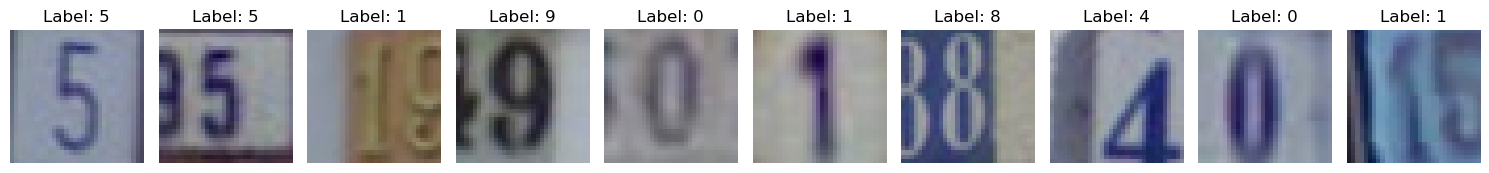

In [14]:
# Lets see some images of the data set
def show_images(dataloader, num_images):

    # Get a batch of data
    images, labels = next(iter(dataloader))
    
    # Plot images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        # Unnormalize the image (from Tensor to numpy array)
        image = images[i].numpy().transpose((1, 2, 0))  # (C, H, W) to (H, W, C)
        # Plot image
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display the first 5 images from the training dataset
n_images = 10
show_images(dataloader_train, n_images)

# Lets define the model

In [16]:
# Lets define the a class for the model
class OCRModel(nn.Module):

    def __init__(self, n_classes):
        super().__init__()
        # Define a block that will extract features from images
        self.feature_extractor = nn.Sequential(
            # First Conv Layer
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1), # 16 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 16 x 16 x 16
            # Second Conv Layer
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1), # 32 x 16 x 16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 8 x 8
            # Third Conv Layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), # 64 x 8 x 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 64 x 4 x 4
            # Flatten Layer
            nn.Flatten(),
        )
        # Add a Linear Layer
        self.classifier = nn.Linear(64 * 4 * 4, n_classes)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

# Some parameters before tranning 

In [18]:
# Create the model
model = OCRModel(n_unique_labels)
print("Model Summary:\n",model)

# Define the optimizer
learning_rate = 0.001
    
# Define variables to training loop
num_epochs = 45
total_steps = len(dataloader_train)

# Define the loss we will lose
loss_criterion = nn.CrossEntropyLoss() # Commonly used as a loss function in classification tasks,
                                       # especially when the model outputs probabilities

import os
from PIL import Image
# Define paths for saving and loading the CNN
OCR_model_path = 'OCR_CNN_model.pth'
lossEpoch_graph_path = 'lossEpoch_graph.png'

Model Summary:
 OCRModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)


# Lets make the training loop

No molde saved found -> Beginning Training...

DONT FORGET:
Training data has 73257 images and the batch size is 20.

Epoch 1 began!
Epoch [1/45], Step [100/3663], Loss: 2.2423
Epoch [1/45], Step [200/3663], Loss: 2.2430
Epoch [1/45], Step [300/3663], Loss: 2.2246
Epoch [1/45], Step [400/3663], Loss: 2.1945
Epoch [1/45], Step [500/3663], Loss: 1.9409
Epoch [1/45], Step [600/3663], Loss: 1.6241
Epoch [1/45], Step [700/3663], Loss: 1.3689
Epoch [1/45], Step [800/3663], Loss: 1.0958
Epoch [1/45], Step [900/3663], Loss: 1.0385
Epoch [1/45], Step [1000/3663], Loss: 0.9393
Epoch [1/45], Step [1100/3663], Loss: 0.9131
Epoch [1/45], Step [1200/3663], Loss: 0.7877
Epoch [1/45], Step [1300/3663], Loss: 0.8049
Epoch [1/45], Step [1400/3663], Loss: 0.7678
Epoch [1/45], Step [1500/3663], Loss: 0.7289
Epoch [1/45], Step [1600/3663], Loss: 0.7252
Epoch [1/45], Step [1700/3663], Loss: 0.7049
Epoch [1/45], Step [1800/3663], Loss: 0.7206
Epoch [1/45], Step [1900/3663], Loss: 0.6536
Epoch [1/45], Step [2

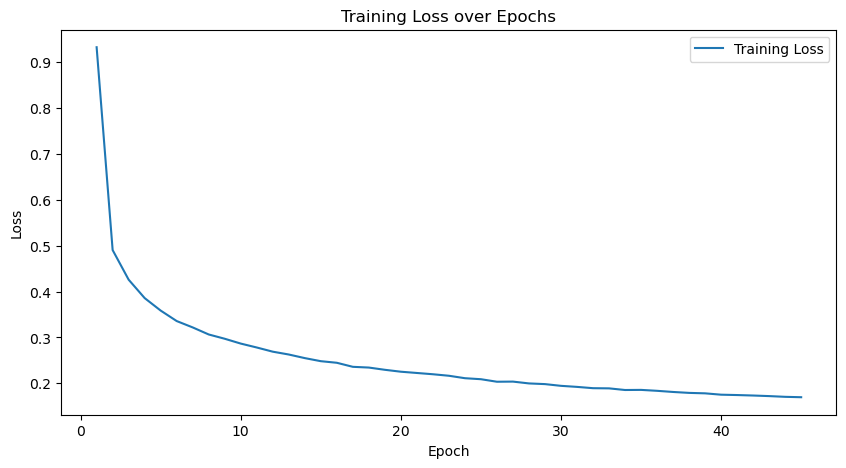

Saved the Softmax Loss plot to lossEpoch_graph.png


In [20]:
# Check if the model file exists
if os.path.exists(OCR_model_path):

    # Load the existing model
    model = OCRModel(n_unique_labels)
    model.load_state_dict(torch.load(OCR_model_path))
    print("Loaded existing CNN model for ORC from", OCR_model_path)
    # Lets show the loss graph
    image_Loss_Epoch = Image.open(lossEpoch_graph_path)
    image_Loss_Epoch.show()

else:

    print("No molde saved found -> Beginning Training...\n")
    print(f"DONT FORGET:\nTraining data has {len(train_data)} images and the batch size is {batch_size}.\n")
    
    # Define the optimzier with ADAM
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Define a list to store epoch losses
    epoch_losses = []

    # Training loop - Iterate over each epoch
    for epoch in range(num_epochs):
        
        # Variables for traking
        batch_counter = 0
        epoch_loss = 0
        epoch_loss_total = 0
        print(f"Epoch {epoch + 1} began!")

        # Iterate over each batch
        for images, labels in dataloader_train:
            # Lest reset the gradients (derivatives of the loss function)
            optimizer.zero_grad()
            # Forward pass: where we calculate the output of the neural network
            prediction = model(images)
            # Forward pass: where we calculate the loss of the model based on the predictions and the actual targets
            loss = loss_criterion(prediction, labels)
            # Backward Pass: where we compute the gradients of the loss with respect to each parameter
            loss.backward()
            # Finally we update the parameters
            optimizer.step()

            # Sum the loss of each step of the epoch
            epoch_loss += loss.item()
            epoch_loss_total += loss.item()
            if (batch_counter + 1) % 100 == 0: # Print every 100 batches
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_counter+1}/{total_steps}], Loss: {epoch_loss / 100:.4f}')
                epoch_loss = 0
    
            # Increment batch_counter
            batch_counter += 1

        # Calculate average epoch loss
        avg_epoch_loss = epoch_loss_total / len(dataloader_train)
        print(f"Loss of Epoch {epoch + 1}: {avg_epoch_loss}")
        epoch_losses.append(avg_epoch_loss)

    print("\nTraining Finished :)")

    # Save the trained model
    torch.save(model.state_dict(), OCR_model_path)
    print("\nTrained and saved the CNN model with Softmax to", OCR_model_path)

    # Plotting the loss graph
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), epoch_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    # Save the plot as an image
    plt.savefig(lossEpoch_graph_path)
    plt.show()
    print(f"Saved the Softmax Loss plot to {lossEpoch_graph_path}")

# Lets test the models we did
###### Calculate accuracy of the model and then precission and recall per-class

In [22]:
from torchmetrics import Accuracy, Precision, Recall
from tabulate import tabulate

# Get the model on evaluation mode
model.eval()

metric_accuracy = Accuracy(task="multiclass", num_classes=n_unique_labels)
metric_precision = Precision(task="multiclass", num_classes=n_unique_labels, average=None) 
metric_recall = Recall(task="multiclass", num_classes=n_unique_labels, average=None)

# Lets define the evaluation loop
with torch.no_grad():
    # Run though test images batches
    for images, labels in dataloader_test:
        # Get output from model
        outputs = model(images)
        # Predicted class label
        _, predictions = torch.max(outputs, 1)
        # Calculate the metrics
        metric_accuracy(predictions, labels)
        metric_precision(predictions, labels)
        metric_recall(predictions, labels)

# Compute the Metrics
accuracy = metric_accuracy.compute()
precision = metric_precision.compute()
recall = metric_recall.compute()

# Print the metrics
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")

print("\nPrecision per class:")
for i in range(n_unique_labels):
    print(f"Class {i}: {precision.tolist()[i]:.4f}")

print("\nRecall per class:")
for i in range(n_unique_labels):
    print(f"Class {i}: {recall.tolist()[i]:.4f}")


Metrics:
Accuracy: 0.8775

Precision per class:
Class 0: 0.8660
Class 1: 0.9121
Class 2: 0.9189
Class 3: 0.7938
Class 4: 0.9069
Class 5: 0.8839
Class 6: 0.8455
Class 7: 0.9113
Class 8: 0.8543
Class 9: 0.8067

Recall per class:
Class 0: 0.8710
Class 1: 0.9196
Class 2: 0.9062
Class 3: 0.8685
Class 4: 0.8914
Class 5: 0.8721
Class 6: 0.8467
Class 7: 0.8603
Class 8: 0.7735
Class 9: 0.8451
